<a href="https://colab.research.google.com/github/shruti-singh/DL-NLP/blob/master/FeedForward_IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1MB 4.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [0]:
def iris_data_preprocessing():
  # Preprocess the IRIS dataset
  IRIS_Train = "http://download.tensorflow.org/data/iris_training.csv"
  IRIS_Test = "http://download.tensorflow.org/data/iris_test.csv"

  data_labels = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
  train_dataset = pd.read_csv(IRIS_Train, names=data_labels, skiprows=1)
  test_dataset = pd.read_csv(IRIS_Test, names=data_labels, skiprows=1)

  # Separate the X, y labels
  y_train = pd.get_dummies(train_dataset.species)
  X_train = train_dataset.drop('species', axis=1)

  y_test = pd.get_dummies(test_dataset.species)
  X_test = test_dataset.drop('species', axis=1)

  print("Size of train set: ", X_train.shape)
  print("Size of test set: ", X_test.shape)

  return (X_train, y_train), (X_test, y_test)

In [3]:
train, test = iris_data_preprocessing()

Size of train set:  (120, 4)
Size of test set:  (30, 4)


In [0]:
class FeedForwardModel:

  def __init__(self, learning_rate=0.005, num_iters=2000, batch_size=120):
    self.learning_rate = learning_rate
    self.num_iters = num_iters
    self.batch_size = batch_size

    self.model = None

    self.initialize_layers()
    return
  
  def initialize_layers(self):
    # TODO: Generalize this.

    features = 4
    neurons_h1 = 30   # Neurons in 1st hidden layer
    neurons_h2 = 10   # Neurons in 2nd hidden layer
    out_classes = 3

    self.weights = {
        "h1": tf.Variable(tf.random_normal([features, neurons_h1])),
        "h2": tf.Variable(tf.random_normal([neurons_h1, neurons_h2])),
        "out": tf.Variable(tf.random_normal([neurons_h2, out_classes]))
    }

    self.biases = {
        "b1": tf.Variable(tf.random_normal([neurons_h1])),
        "b2": tf.Variable(tf.random_normal([neurons_h2])),
        "out": tf.Variable(tf.random_normal([out_classes])),
    }
    
    self.X = tf.placeholder("float", [None, features])
    self.Y = tf.placeholder("float", [None, out_classes])
    return
  
  def create_model(self, x):
    # Todo: Generalize model skeleton construction
    hidden_layer_1 = tf.add(tf.matmul(x, self.weights["h1"]), self.biases["b1"])
    hidden_layer_2 = tf.add(tf.matmul(hidden_layer_1, self.weights["h2"]), self.biases["b2"])
    output_layer = tf.matmul(hidden_layer_2, self.weights["out"]) + self.biases["out"]
    self.model = output_layer
    return
  
  def plot_confusion_matrix(self, y_, y_predicted):
    cm = confusion_matrix(y_, y_predicted)
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #   ax.text(j, i, format(cm[i, j], 'd') if cm[i,j]!=0 else '.', horizontalalignment="center", fontsize=6, verticalalignment='center', color= "black")
    #   fig.set_tight_layout(True)
    #   summary = tfplot.figure.to_summary(fig, tag="Figures/")
    return
    
  def train_and_test(self, train_data, test_data):

    X_train = train_data[0]
    y_train = train_data[1]

    X_test = test_data[0]
    y_test = test_data[1]
    

    # Loss function. Todo: Generalize this.
    loss_opn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.model, labels=self.Y))
    
    # To minimize the loss
    self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate)
    train_proc = self.optimizer.minimize(loss_opn)
    
    # Eval
    predict = tf.nn.softmax(self.model)
    c_p = tf.equal(tf.argmax(predict, 1), tf.argmax(self.Y, 1))
    accuracy = tf.reduce_mean(tf.cast(c_p, tf.float32))
    
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    for i in range(self.num_iters):
      sess.run(train_proc, feed_dict={self.X: X_train, self.Y: y_train})
      if i % 500 == 0:
        loss, acc = sess.run([loss_opn, accuracy], feed_dict={self.X: X_train, self.Y: y_train})
        print("Iter " + str(i) + " Loss: " + str(loss) + " and Train accuracy: " + str(acc))
    
    print("On Test Set:")
    print("Accuracy: ", sess.run(accuracy, feed_dict={self.X: X_test, self.Y: y_test}))
    # self.plot_confusion_matrix(X_test, y_test)

    # prediction = tf.nn.softmax(self.model)
    predicted_labels = sess.run(predict, feed_dict={self.X: X_test})
    y_ = tf.argmax(y_test, 1).eval(session=sess)
    predicted_ = tf.argmax(predicted_labels, 1).eval(session=sess)

    self.plot_confusion_matrix(y_, predicted_)
    
    return

  def run(self, train, test):
    self.create_model(self.X)
    self.train_and_test(train, test)
    return
  


Iter 0 Loss: 25.08494 and Train accuracy: 0.5083333
Iter 500 Loss: 0.075165845 and Train accuracy: 0.9916667
Iter 1000 Loss: 0.0473414 and Train accuracy: 0.9916667
Iter 1500 Loss: 0.03830153 and Train accuracy: 0.9916667
On Test Set:
Accuracy:  0.93333334
[[ 8  0  0]
 [ 0 13  1]
 [ 0  1  7]]


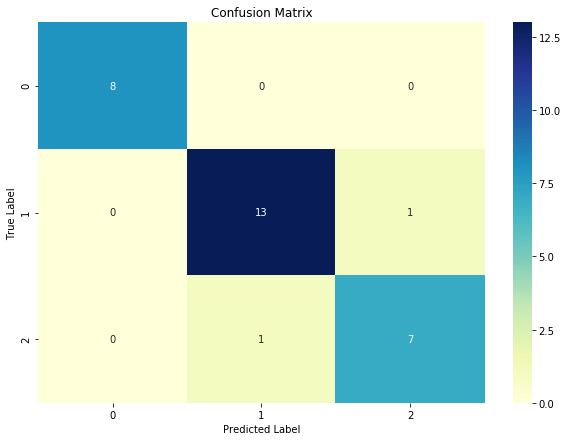

In [9]:
nn = FeedForwardModel()
nn.run(train, test)